In [1]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from rllr.utils.plotting.video import show_video
from rllr.utils.logger import init_logger
from rllr.utils.common import switch_reproducibility_on
from rllr.utils.plotting.display import display_stats

In [3]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
config['env']['video_path'] = './video/'

In [4]:
switch_reproducibility_on(config['seed'])

# Train worker

In [5]:
from experiments import train_worker
init_logger('train_worker')

In [6]:
env = train_worker.gen_navigation_env(config['env'])

In [7]:
worker_agent = train_worker.get_agent(config)

In [8]:
scores, steps = train_worker.run_episodes(env, worker_agent, n_episodes=500, verbose=100)

Episode: 100. scores: -10.61, steps: 115.09, achieved: 0.82
Episode: 200. scores: -5.75, steps: 67.62, achieved: 0.92
Episode: 300. scores: -1.91, steps: 29.80, achieved: 0.97
Episode: 400. scores: -0.68, steps: 17.64, achieved: 0.99
Episode: 500. scores: -0.92, steps: 19.75, achieved: 0.96


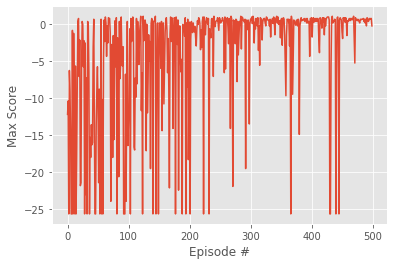

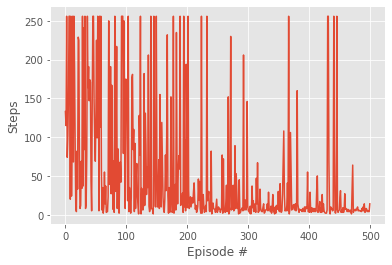

In [9]:
display_stats(scores, steps)

# Train master

In [10]:
from experiments import train_master
init_logger('train_master')

In [11]:
config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
del config['env']['goal_achieving_criterion']
del config['env']['goal_type']

In [15]:
emb_size = worker_agent.qnetwork_local.state_encoder.goal_state_encoder.output_size
master_agent = train_master.get_master_agent(emb_size, config)
worker_agent.explore = False

In [16]:
env = train_worker.gen_env(config['env'])

In [ ]:
scores, steps = train_master.run_episodes(env, worker_agent, master_agent, n_episodes=1000, verbose=100)

Episode: 100. scores: 0.04, steps: 248.04
Episode: 200. scores: 0.03, steps: 250.01
Episode: 300. scores: 0.01, steps: 253.95
Episode: 400. scores: 0.02, steps: 252.72
Episode: 500. scores: 0.00, steps: 256.00
Episode: 600. scores: 0.01, steps: 254.24
Episode: 700. scores: 0.00, steps: 256.00
Episode: 800. scores: 0.00, steps: 256.00
Episode: 900. scores: 0.00, steps: 256.00


In [ ]:
display_stats(scores, steps)